# **Model Deployment for Depression Classification in Text**

**Group:** fallingcat.gif

**Group Members:**
1. Muhammad Waiz Wafiq bin Mohamad Jafri (17203410/2)
2. Ho Zhi Yi (U2005261)
3. Lim Chooi Yeng (S2031013)
4. Muhammad Zyad Zarin bin Zamberi (17203070)
5. Lawrence Leroy Chieng Tze Yao (S2018935)

*This project is done under the course WID3006: Machine Learning in Faculty of Computer Science and Information Technology (FCSIT), University Malaya.*

`Date: 17/06/2022`

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re # RegEx library
import ftfy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\Waiz
[nltk_data]     Wafiq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Waiz
[nltk_data]     Wafiq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Waiz
[nltk_data]     Wafiq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Waiz
[nltk_data]     Wafiq\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Upload Data

In [2]:
# random tweets (only take 2345 tweets to balance with the depressed dataset)
df_non_depressed = pd.read_csv("./dataset/SAD2.csv", nrows=2345) 
df_non_depressed.head(3)

,ItemID,Sentiment,SentimentSource,SentimentText,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,0,Sentiment140,is so sad for my APL frie...,NaN,NaN,NaN
1,2,0,Sentiment140,I missed the New Moon trail...,NaN,NaN,NaN
2,3,1,Sentiment140,omg its already 7:30 :O,NaN,NaN,NaN


In [3]:
# The depressed dataset
df_depressed = pd.read_csv('./dataset/depressive_tweets_processed.csv', sep='|', header=None, usecols=range(0,9))
df_depressed.head(3)

,0,1,2,3,4,5,6,7,8
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...,1,0,3
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...,1,0,2
2,989292951716155392,2018-04-25,23:59:54,Eastern Standard Time,TheAlphaAries,depression is something i don't speak about ev...,0,0,0


In [4]:
# New dataset (5170 depressed, 18793 non-depressed)
df_new = pd.read_csv('./dataset/new_dataset.csv')
df_new_non_depressed = df_new.loc[df_new['vader_sentiment_label'] == 0][:5170]
df_new_depressed = df_new.loc[df_new['vader_sentiment_label'] == 1]

## Data Preprocessing

### Expanding Contractions

In [5]:
# List of Contractions
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "i'd": "I would",
  "i'd've": "I would have",
  "i'll": "I will",
  "i'll've": "I will have",
  "i'm": "I am",
  "i've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have",
  "aint": "am not",
  "arent": "are not",
  "cant": "cannot",
  "cantve": "cannot have",
  "cause": "because",
  "couldve": "could have",
  "couldnt": "could not",
  "couldntve": "could not have",
  "didnt": "did not",
  "doesnt": "does not",
  "dont": "do not",
  "hadnt": "had not",
  "hadntve": "had not have",
  "hasnt": "has not",
  "havent": "have not",
  "hed": "he would",
  "hes": "he is",
  "howll": "how will",
  "hows": "how is",
  "Id": "I would",
  "Id've": "I would have",
  "Im": "I am",
  "id": "I would",
  "id've": "I would have",
  "im": "I am",
  "isnt": "is not",
  "itd": "it had",
  "itll": "it will",
  "lets": "let us",
  "maam": "madam",
  "maynt": "may not",
  "mightve": "might have",
  "neednt": "need not",
  "shes": "she is",
  "shouldve": "should have",
  "shouldnt": "should not",
  "thatd": "that would",
  "thats": "that is",
  "theres": "there is",
  "theyd": "they would",
  "theyll": "they will",
  "theyre": "they are",
  "theyve": "they have",
  "wasnt": "was not",
  "we'll": "we will",
  "werent": "were not",
  "whatll": "what will",
  "whats": "what is",
  "whens": "when is",
  "wheres": "where is",
  "wholl": "who will",
  "whos": "who is",
  "whys": "why is",
  "wont": "will not",
  "wont've": "will not have",
  "would of": "would have",
  "wouldnt": "would not",
  "yall": "you all",
  "yalls": "you alls",
  "yall'd": "you all would",
  "yall'd've": "you all would have",
  "yall're": "you all are",
  "yall've": "you all have",
  "youd": "you had",
  "youll": "you you will",
  "youre": "you are",
  "youve": "you have"
}

In [6]:
# Compile all of the contractions to match with the texts
c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        # Replacing the short form into the long form (expanding it)
        return cList[match.group(0)]
    
    return c_re.sub(replace, text)

### Data Cleaning

In [7]:
def clean_txt(texts):
    '''The function to clean the text of all irrelevant values.
    params:
        texts: The text (list of str)
    returns:
        The cleaned text (list of str)
    '''
    cleaned_txt = []
    
    for text in texts:
        text = str(text).lower()
        # if url links then dont append to avoid news articles
        # also check text length, save those > 10 (length of word "depression")
        if re.match("(\w+:\/\/\S+)", text) == None and len(text) > 10:
            # remove hashtag, @mention, emoji and image URLs
            text = ' '.join(
                re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", text).split())

            # Fix weirdly encoded texts
            text = ftfy.fix_text(text)

            # Expand contractions
            text = expandContractions(text)

            # Remove punctuation
            text = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", text).split())

            # Stop words
            stop_words = set(stopwords.words('english'))
            word_tokens = nltk.word_tokenize(text)
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            text = ' '.join(filtered_sentence)

            # Lemmatize the text, we'll use WordNet
            text = WordNetLemmatizer().lemmatize(text)

            cleaned_txt.append(text)

    return cleaned_txt
            

In [8]:
# Take the text columns from each dataframe and clean them
a10 = [x for x in df_non_depressed['SentimentText']]
a11 = [x for x in df_depressed[5]]
a20 = [x for x in df_new_non_depressed['clean_tweet']]
a21 = [x for x in df_new_depressed['clean_tweet']]

X10 = clean_txt(a10)
X11 = clean_txt(a11)
X20 = clean_txt(a20)
X21 = clean_txt(a21)

In [9]:
# Concatenating the two dataframes and labelling them

df1 = pd.DataFrame(
    {
        'text': X10,
        'label': [0]*len(X10)
    }
)

df2 = pd.DataFrame(
    {
        'text': X11,
        'label': [1]*len(X11)
    }
)

df3 = pd.DataFrame(
    {
        'text': X20,
        'label': [0]*len(X20)
    }
)

df4 = pd.DataFrame(
    {
        'text': X21,
        'label': [1]*len(X21)
    }
)

df = pd.concat([df1, df2]) #, df3, df4])
print("Number of data:", len(df))

Number of data: 4624


In [10]:
# Remove empty texts
print(f"{len(df[df['text'] == ''])} number of empty rows found!")
df.drop(df.index[df['text'] == ''], inplace=True)
print("Current number of data:", len(df))

21 number of empty rows found!
Current number of data: 4582


In [11]:
# Save the new dataset
df.to_csv('./dataset/combined_dataset.csv', index=False)

In [12]:
df = pd.read_csv('./dataset/combined_dataset.csv')

## Data Exploration

non-depressed data rows = 2295,  depressed data rows = 2287


c:\Users\Waiz Wafiq\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Dataset Sizes')]

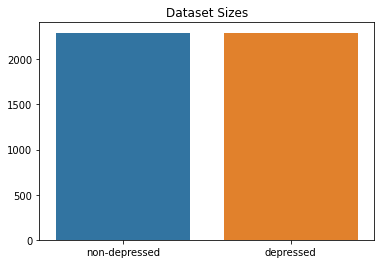

In [13]:
# Explore the dataset sizes to avoid biases
print(f"non-depressed data rows = {len(df.loc[df['label'] == 0])},  depressed data rows = {len(df.loc[df['label'] == 1])}")
sns.barplot(['non-depressed','depressed'], [len(df.loc[df['label'] == 0]), len(df.loc[df['label'] == 1])]).set(title="Dataset Sizes")

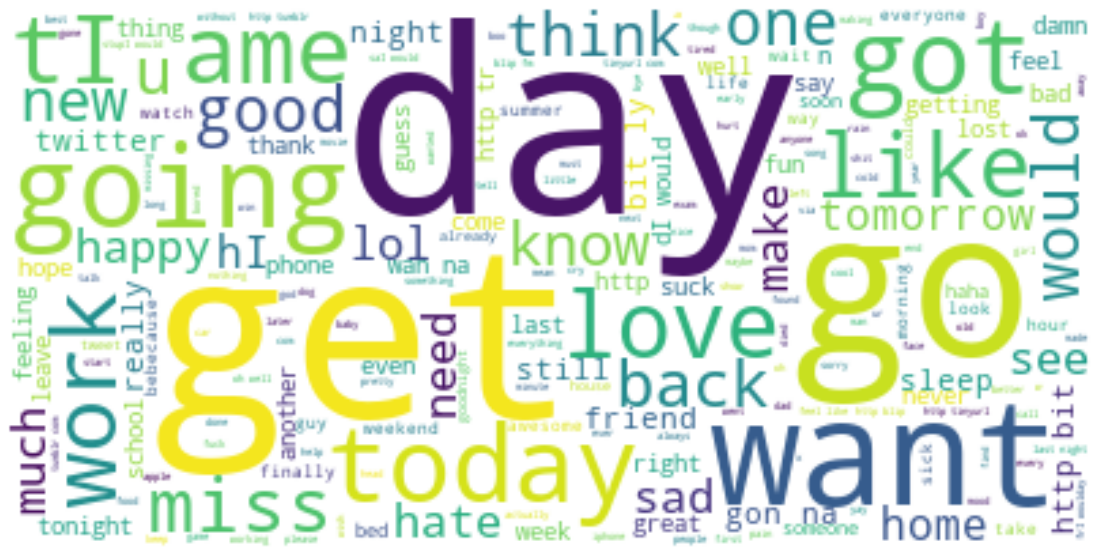

In [32]:
# Display the word cloud for non-depressed texts
from wordcloud import WordCloud

str_df = " ".join(df.loc[df['label']==0].text.to_list())

plt.figure(figsize=(20,10))
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(str_df)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

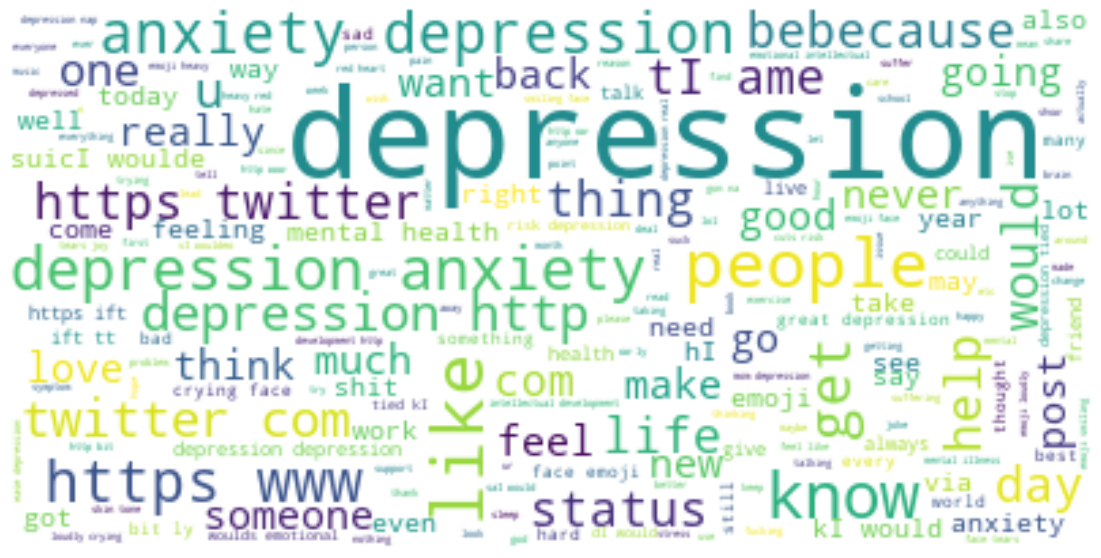

In [33]:
# Display the word cloud for depressed texts
from wordcloud import WordCloud

str_df = " ".join(df.loc[df['label']==1].text.to_list())

plt.figure(figsize=(20,10))
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(str_df)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

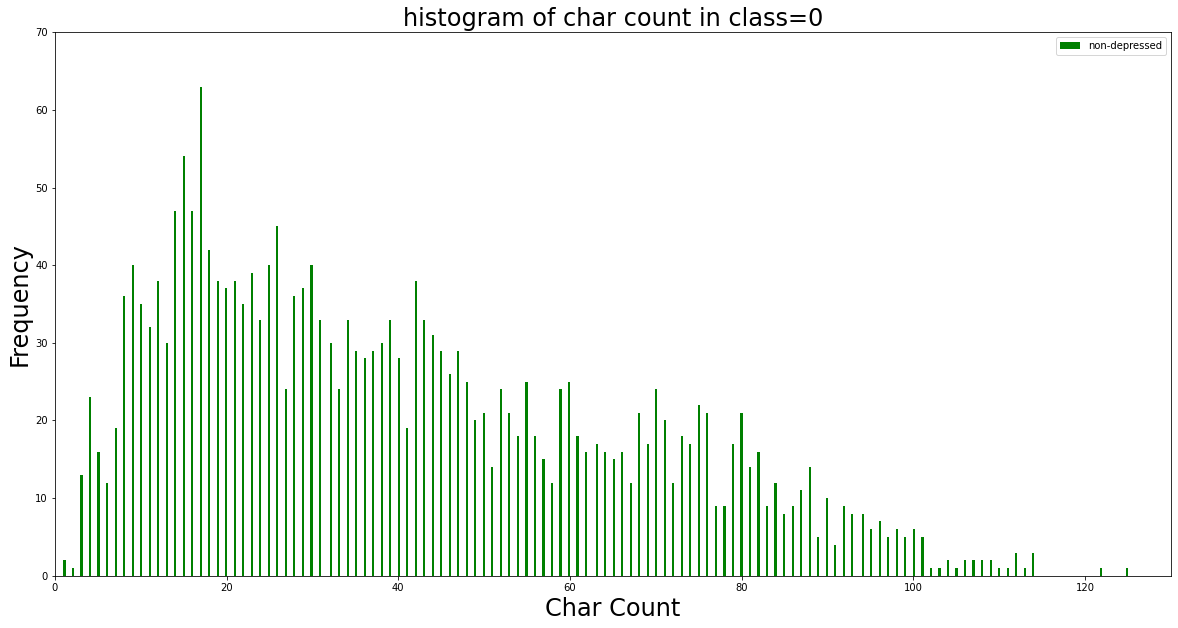

In [75]:
# Plot histogram of character count in non-depressed texts
plt.hist(df.loc[df['label']==0]['text'].str.len(), bins=500, color='green', label='non-depressed')

plt.title("histogram of char count in class=0", fontsize=24)
plt.xlabel("Char Count", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.ylim((0,70))
plt.xlim((0,130))
plt.legend()
plt.show()

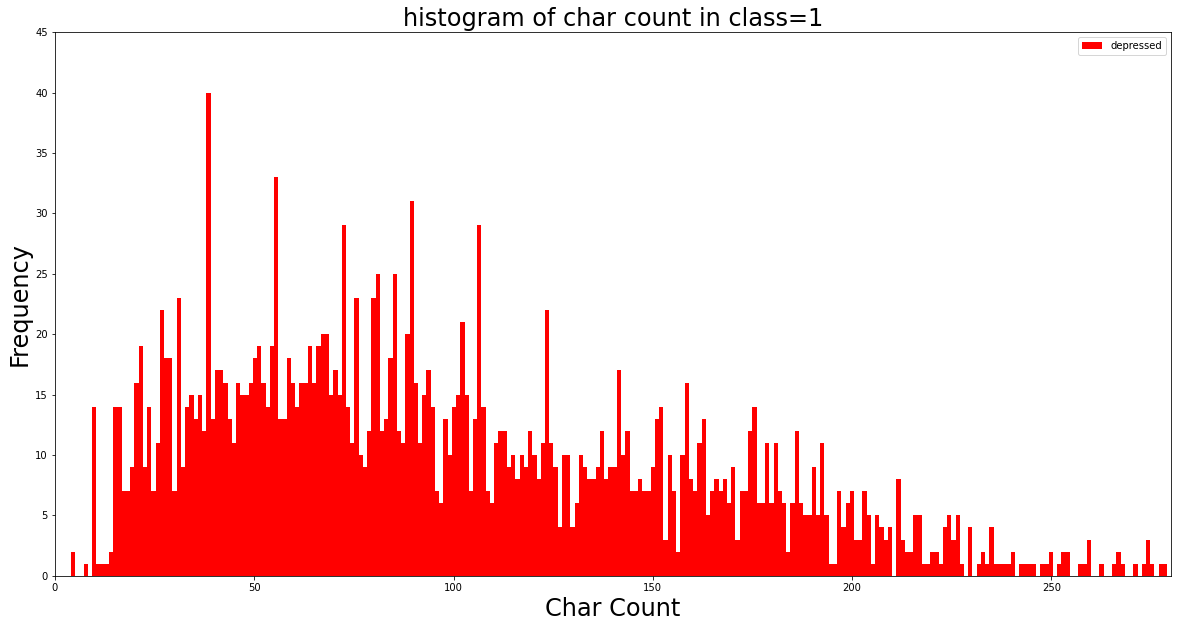

In [76]:
# Plot histogram of character count in depressed texts
plt.hist(df.loc[df['label']==1]['text'].str.len(), bins=500, color='red', label='depressed')

plt.title("histogram of char count in class=1", fontsize=24)
plt.xlabel("Char Count", fontsize=24)
plt.ylabel("Frequency", fontsize=24)
plt.ylim((0,45))
plt.xlim((0,280))
plt.legend()
plt.show()

## Text Representation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

X, y = df['text'], df['label']

# Vectorizing and representing the texts to feed into the model
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(count_vect.fit_transform(X))


## Model Deployment (Selection and Evaluation)

In [79]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

def score_models(X, y, models):
    '''A function to score the dictionary of models for model selection.
    params:
        X: A list of features (in this case, the vectorized texts)
        y: A list of labels (binary labels, 0 and 1)
    returns:
        A list of trained models to be used for prediction
    '''
    # 80% train, 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # kfold-cv, k = 10
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
        
    models_trained = []
    for model in models.keys():
        # Display confusion matrix, accuracy and cross-validation accuracy for each model
        scores = cross_val_score(models[model], X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        
        clf = models[model].fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print("Model:", model)
        
        conf_mat = confusion_matrix(y_test, y_pred)
        print(conf_mat)
        # print(classification_report(y_test, y_pred))
        print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100}%, Recall: {recall_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred)}, F1: {f1_score(y_test, y_pred)}")
        print('Cross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
        print(50*"-")
        models_trained.append(clf)
    
    return models_trained
    
# A dictionary of models to train
models = {
    'LogisticRegression': LogisticRegression(),
    'LinearSVC': CalibratedClassifierCV(LinearSVC()),
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier()
}

clfs = score_models(X, y, models)

Model: LogisticRegression
[[450   1]
 [ 33 433]]
Accuracy: 96.29225736095965%, Recall: 0.9291845493562232, Precision: 0.9976958525345622, F1: 0.9622222222222223
Cross-Validation accuracy: 0.969 +/- 0.010
--------------------------------------------------
Model: LinearSVC
[[450   1]
 [ 35 431]]
Accuracy: 96.07415485278081%, Recall: 0.924892703862661, Precision: 0.9976851851851852, F1: 0.9599109131403119
Cross-Validation accuracy: 0.973 +/- 0.009
--------------------------------------------------
Model: MultinomialNB
[[378  73]
 [ 32 434]]
Accuracy: 88.54961832061069%, Recall: 0.9313304721030042, Precision: 0.8560157790927022, F1: 0.8920863309352518
Cross-Validation accuracy: 0.892 +/- 0.017
--------------------------------------------------
Model: RandomForestClassifier
[[449   2]
 [ 18 448]]
Accuracy: 97.81897491821155%, Recall: 0.9613733905579399, Precision: 0.9955555555555555, F1: 0.9781659388646288
Cross-Validation accuracy: 0.981 +/- 0.006
------------------------------------------

In [16]:
def predict(text):
    '''A function to predict a string of text
    params:
        text: A string to predict
    returns:
        None
    '''
    
    l = []
    
    for i in range(len(clfs)):
        l.append(clfs[i].predict(count_vect.transform(clean_txt([text]))))

    print(f"""Labels predicted by:
            LogisticRegression: {l[0]}, Confidence: {clfs[0].predict_proba(count_vect.transform(clean_txt([text])))[0, l[0]]}
            LinearSVC: {l[1]}, Confidence: {clfs[1].predict_proba(count_vect.transform(clean_txt([text])))[0, l[1]]}
            MultinomialNB: {l[2]}, Confidence: {clfs[2].predict_proba(count_vect.transform(clean_txt([text])))[0, l[2]]}
            RandomForestClassifier: {l[3]}, Confidence: {clfs[3].predict_proba(count_vect.transform(clean_txt([text])))[0, l[3]]}
        """)

In [17]:
text1 = '''im not sure if i can go on with my life like this anymore. Feeling depressed as hell. I wish there is something that I can do
to make myself feel any better. But, I guess it is what it is. I guess this is what depression look and feel like'''


text2 = '''i just got a job at Tesla as an AI engineer! im so happy that i worked this hard to be the one my 10-year-old self dreamed about.
i have received the offer letter just now and cant wait to tell my mom and dad about it! they'll really proud of me after hearing
about this!
'''

predict(text1)
predict(text2)

Labels predicted by:
            LogisticRegression: [1], Confidence: [1.]
            LinearSVC: [1], Confidence: [1.]
            MultinomialNB: [1], Confidence: [0.99514555]
            RandomForestClassifier: [1], Confidence: [0.66]
        
Labels predicted by:
            LogisticRegression: [1], Confidence: [0.66155334]
            LinearSVC: [1], Confidence: [0.89202364]
            MultinomialNB: [1], Confidence: [0.53248944]
            RandomForestClassifier: [0], Confidence: [0.65]
        


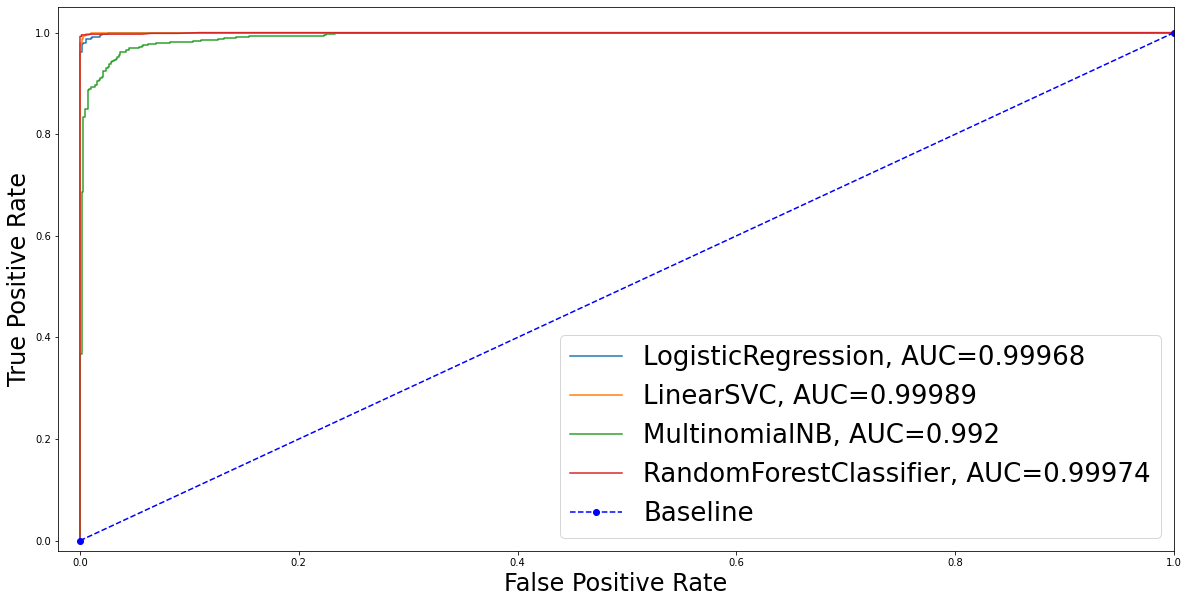

In [81]:
import sklearn.metrics as metrics

plt.rcParams['figure.figsize'] = [20, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Plot ROC curve and calculate the AUC 

for model_no in range(4):
    y_pred = clfs[model_no].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 5)
    plt.plot(fpr, tpr, label=f'{list(models)[model_no]}, AUC={str(auc)}')

# The baseline (0,0) to (1,1)
plt.plot([0,1],[0,1], 'bo', linestyle='--', label='Baseline')

plt.xlim((-0.02, 1))
plt.ylim((-0.02, 1.05))
plt.xlabel("False Positive Rate", fontsize=24)
plt.ylabel("True Positive Rate", fontsize=24)
plt.legend(prop={'size': 26})

### Save Models

In [ ]:
# Save the models
import joblib
for model_no in range(len(clfs)):
    joblib.dump(clfs[model_no], f'./new_models/{list(models)[model_no]}_model.pkl')
    
# Save the vectorizer
joblib.dump(count_vect, f'./new_models/vectorizer.pkl')